In [26]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [27]:
from sklearn import datasets

iris_sklearn = datasets.load_iris()
mushroom = pd.read_csv('./mushrooms.csv')

# Mushroom dataset

In [28]:
mushroom.shape

(8124, 23)

In [29]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [30]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [31]:
for x in mushroom.columns:
    print(mushroom[x].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
bruises
f    4748
t    3376
Name: count, dtype: int64
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
gill-attachment
f    7914
a     210
Name: count, dtype: int64
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
gill-size
b    5612
n    2512
Name: count, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: coun

In [32]:
mushroom['stalk-root'] = mushroom['stalk-root'].replace('?', np.nan)

In [33]:
for x in mushroom.columns:
    print(mushroom[x].value_counts()/np.float64(len(mushroom)))

class
e    0.517971
p    0.482029
Name: count, dtype: float64
cap-shape
x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: count, dtype: float64
cap-surface
y    0.399311
s    0.314623
f    0.285574
g    0.000492
Name: count, dtype: float64
cap-color
n    0.281142
g    0.226489
e    0.184638
y    0.131955
w    0.128016
b    0.020679
p    0.017725
c    0.005416
u    0.001969
r    0.001969
Name: count, dtype: float64
bruises
f    0.584441
t    0.415559
Name: count, dtype: float64
odor
n    0.434269
f    0.265879
y    0.070901
s    0.070901
a    0.049237
l    0.049237
p    0.031512
c    0.023634
m    0.004431
Name: count, dtype: float64
gill-attachment
f    0.974151
a    0.025849
Name: count, dtype: float64
gill-spacing
c    0.838503
w    0.161497
Name: count, dtype: float64
gill-size
b    0.690793
n    0.309207
Name: count, dtype: float64
gill-color
b    0.212703
p    0.183653
w    0.147957
n    0.129000
g    0.092565
h    0.090103
u    0.060561
k  

In [34]:
mushroom.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Cardinality check

In [35]:
for x in mushroom.columns:
    
    print(x, ' contains ', len(mushroom[x].unique()), ' labels')

class  contains  2  labels
cap-shape  contains  6  labels
cap-surface  contains  4  labels
cap-color  contains  10  labels
bruises  contains  2  labels
odor  contains  9  labels
gill-attachment  contains  2  labels
gill-spacing  contains  2  labels
gill-size  contains  2  labels
gill-color  contains  12  labels
stalk-shape  contains  2  labels
stalk-root  contains  5  labels
stalk-surface-above-ring  contains  4  labels
stalk-surface-below-ring  contains  4  labels
stalk-color-above-ring  contains  9  labels
stalk-color-below-ring  contains  9  labels
veil-type  contains  1  labels
veil-color  contains  4  labels
ring-number  contains  3  labels
ring-type  contains  5  labels
spore-print-color  contains  9  labels
population  contains  6  labels
habitat  contains  7  labels


# Iris Dataset

In [36]:
iris = pd.DataFrame(data=iris_sklearn.data, columns=iris_sklearn.feature_names) #LLM

In [37]:
iris.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [39]:
iris.shape

(150, 4)

# Data split

In [40]:
X = mushroom.drop(['class'], axis=1)

y = mushroom['class']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None)

In [42]:
from MulitnomialNaiveBayesClassifier import MNBC
# from test import MNBC

In [43]:
mnbc = MNBC()
print(X_train.shape)
mnbc.fit(X_train, y_train)
y_pred = mnbc.predict(X_test)

(5686, 22)


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Model accuracy score:    {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model error score:       {0:0.4f}'. format(1-accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
print('True Positives(TP)   = ', cm[0,0])
print('True Negatives(TN)   = ', cm[1,1])
print('False Positives(FP)  = ', cm[0,1])
print('False Negatives(FN)  = ', cm[1,0])    

Model accuracy score:    0.9475
Model error score:       0.0525
True Positives(TP)   =  1269
True Negatives(TN)   =  1041
False Positives(FP)  =  3
False Negatives(FN)  =  125


<Axes: >

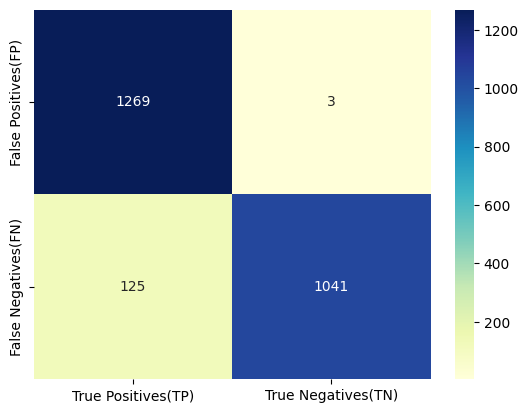

In [45]:
cm_matrix = pd.DataFrame(data=cm, columns=['True Positives(TP)', 'True Negatives(TN)'], index=['False Positives(FP)', 'False Negatives(FN)'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [46]:
X_iris = iris_sklearn.data
y_iris = iris_sklearn.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42)

In [47]:
from GaussianNaiveBayesClassifier import GNBC

In [48]:
gnb = GNBC()
gnb.fit(X_train_iris, y_train_iris)
y_pred_iris = gnb.predict(X_test_iris)

In [49]:
print('Model accuracy score: {:.4f}'.format(accuracy_score(y_test_iris, y_pred_iris)))
print('Model error score:       {0:0.4f}'. format(1-accuracy_score(y_test_iris, y_pred_iris)))
cm = confusion_matrix(y_test_iris, y_pred_iris)
print('True Positives(TP)   = ', cm[0,0])
print('True Negatives(TN)   = ', cm[1,1])
print('False Positives(FP)  = ', cm[0,1])
print('False Negatives(FN)  = ', cm[1,0])   

Model accuracy score: 0.9778
Model error score:       0.0222
True Positives(TP)   =  19
True Negatives(TN)   =  12
False Positives(FP)  =  0
False Negatives(FN)  =  0
